## Implementation with scikit-learn

In [41]:
from sklearn import datasets

Let's try going from 4D to 2D using the classical iris dataset.

In [42]:
iris = datasets.load_iris() # Bunch object
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [43]:
A0 = iris.data # np.array

print("Dimensions:")
print(A0.shape)

print("---")
print("First 5 samples:")
print(A0[:5,:])

print("---")
print("Feature names:")
print(iris.feature_names)

Dimensions:
(150, 4)
---
First 5 samples:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
---
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [45]:
# Using sklearn.decomposition.PCA

pca = PCA(n_components=2) # two components
pca.fit(A0) # run PCA, putting in raw version for fun

print("Principal components:")
print(pca.components_)

print("---")
print("Compressed - 4D to 2D:")
print(pca.transform(A0)[:5,:]) # first 5 obs

print("---")
print("Reconstructed - 2D to 4D:")
print(pca.inverse_transform(pca.transform(A0))[:5,:]) # first 5 obs

Principal components:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
---
Compressed - 4D to 2D:
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]
---
Reconstructed - 2D to 4D:
[[ 5.08718247  3.51315614  1.4020428   0.21105556]
 [ 4.75015528  3.15366444  1.46254138  0.23693223]
 [ 4.70823155  3.19151946  1.30746874  0.17193308]
 [ 4.64598447  3.05291508  1.46083069  0.23636736]
 [ 5.07593707  3.5221472   1.36273698  0.19458132]]


## Another Example

In [31]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

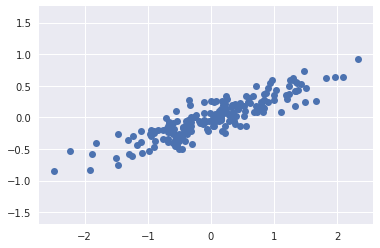

In [32]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

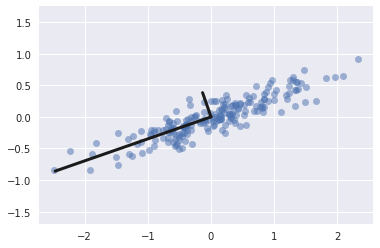

In [34]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [35]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

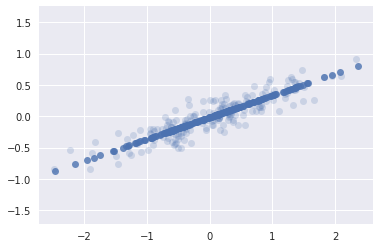

In [36]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.